In [214]:
from datetime import datetime

import numpy as np
from scipy.interpolate import interp1d

from classify import temperature
from model.bridge import Point
from model.bridge.bridge_705 import (bridge_705_3d, bridge_705_med_config)
from model.response import ResponseType
from plot import plt
from plot.temperature import plot_day_lines
from util import resize_units

import importlib
importlib.reload(temperature)

<module 'classify.temperature' from '/Users/jeremy/cs/bridge-dss/code/classify/temperature.py'>

In [215]:
c = bridge_705_med_config(bridge_705_3d)
point_a = Point(x=34.955, y=0, z=29.226)
response_type = ResponseType.YTranslation

INFO: Loaded vehicle data from data/a16-data/a16.csv in 0.11s
WARN: Vehicle PDF sums to 6.3, adjusted to sum to 1


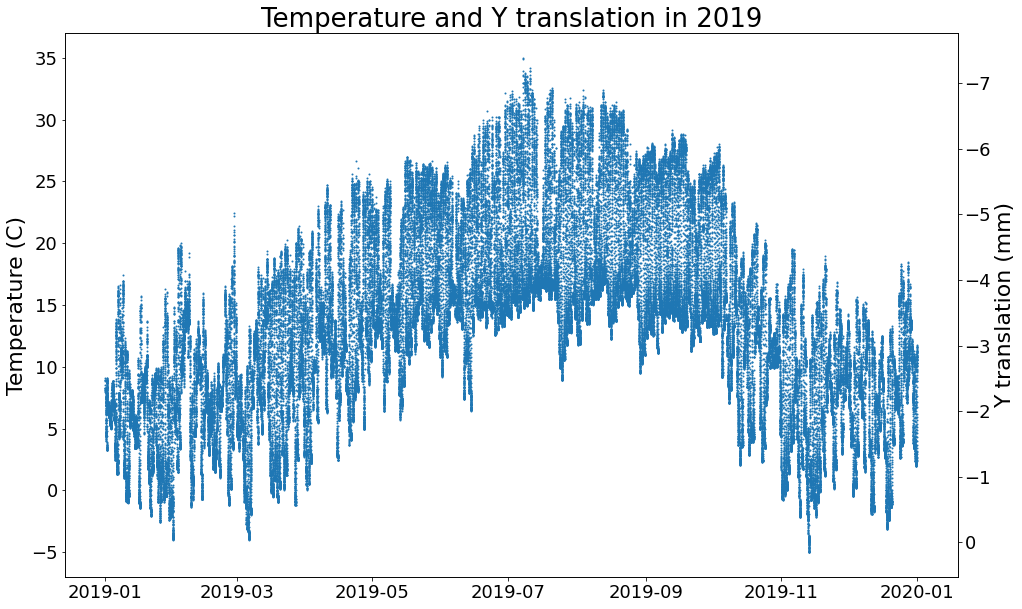

In [216]:
temps_may = temperature.load("holly-springs")
tmin, tmax = min(temps_may["temp"]), max(temps_may["temp"])
new_tmin, new_tmax = -5, 35
temps_may["temp"] = interp1d(np.linspace(tmin, tmax, 1000), np.linspace(new_tmin, new_tmax, 1000))(temps_may["temp"])
effect_may = temperature.effect(c=c, response_type=response_type, points=[point_a], temps=temps_may["temp"])
resize_f, units = resize_units(response_type.units())
effect_may = resize_f(effect_may)

def plot_temp_year():
    plt.scatter(temps_may["datetime"], temps_may["temp"], s=1)
    plt.ylabel("Temperature (C)")
    ax = plt.twinx()
    ax.scatter(temps_may["datetime"], effect_may, s=1, alpha=0)
    plt.ylim(plt.ylim()[1], plt.ylim()[0])
    plt.ylabel(f"{response_type.name()} ({units})")
    plt.title(f"Temperature and {response_type.name()} in 2019")
    
plt.landscape()
plot_temp_year()

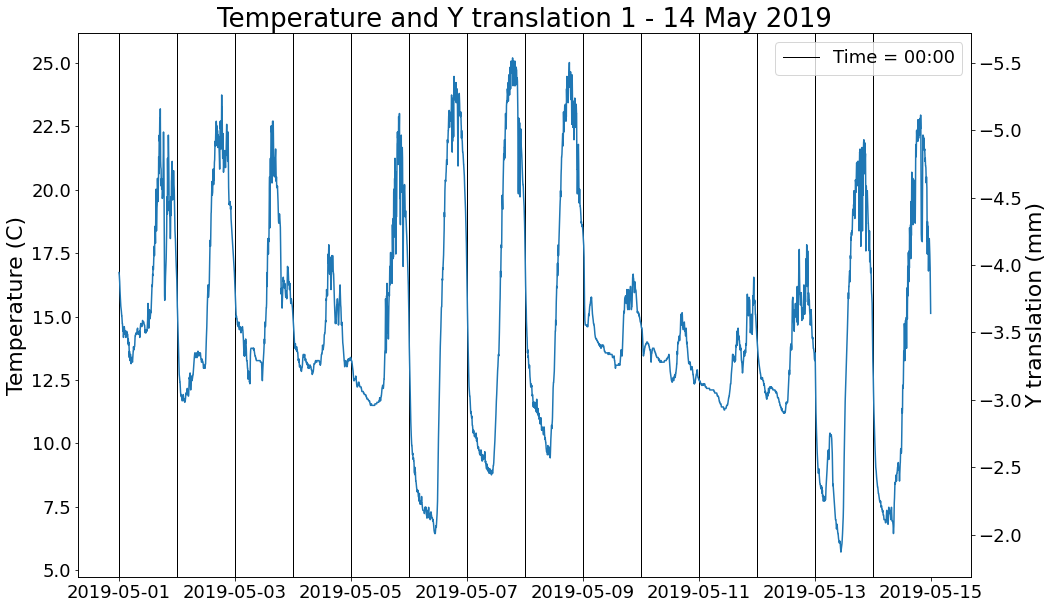

In [217]:
from_ = datetime.fromisoformat(f"2019-05-01T00:00")
to = datetime.fromisoformat(f"2019-05-14T23:59")
temps_month = temperature.from_to_mins(temps_may, from_, to)
effect_month = temperature.effect(c=c, response_type=response_type, points=[point_a], temps=temps_month["temp"])
effect_month = resize_f(effect_month)

def plot_temp_two_weeks():
    plot_day_lines(temps_month["datetime"])
    plt.plot(temps_month["datetime"], temps_month["temp"])
    plt.ylabel("Temperature (C)")
    plt.legend(loc="upper right")
    ax = plt.twinx()
    ax.scatter(temps_month["datetime"], effect_month, s=1, alpha=0)
    plt.ylim(plt.ylim()[1], plt.ylim()[0])
    plt.ylabel(f"{response_type.name()} ({units})")
    plt.title(f"Temperature and {response_type.name()} 1 - 14 May 2019")

plt.landscape()
plot_temp_two_weeks()

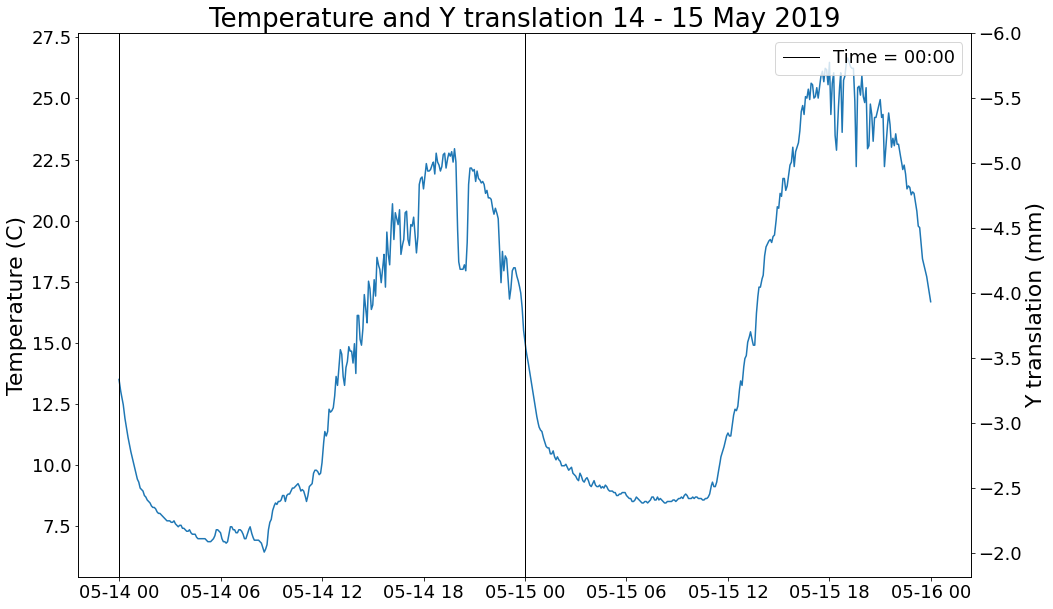

In [218]:
from_ = datetime.fromisoformat(f"2019-05-14T00:00")
to = datetime.fromisoformat(f"2019-05-15T23:59")
temps_days = temperature.from_to_mins(temps_may, from_, to)
effect_days = temperature.effect(c=c, response_type=response_type, points=[point_a], temps=temps_days["temp"])
effect_days = resize_f(effect_days)

def plot_temp_days():
    plt.plot(temps_days["datetime"], temps_days["temp"])
    plot_day_lines(temps_days["datetime"])
    plt.ylabel("Temperature (C)")
    plt.legend(loc="upper right")
    ax = plt.twinx()
    ax.scatter(temps_days["datetime"], effect_days, s=1, alpha=0)
    plt.ylim(plt.ylim()[1], plt.ylim()[0])
    plt.ylabel(f"{response_type.name()} ({units})")
    plt.title(f"Temperature and {response_type.name()} 14 - 15 May 2019")
    
plt.landscape()
plot_temp_days()

INFO: Saving image to ./writing/thesis/saved-images/temperature.pdf


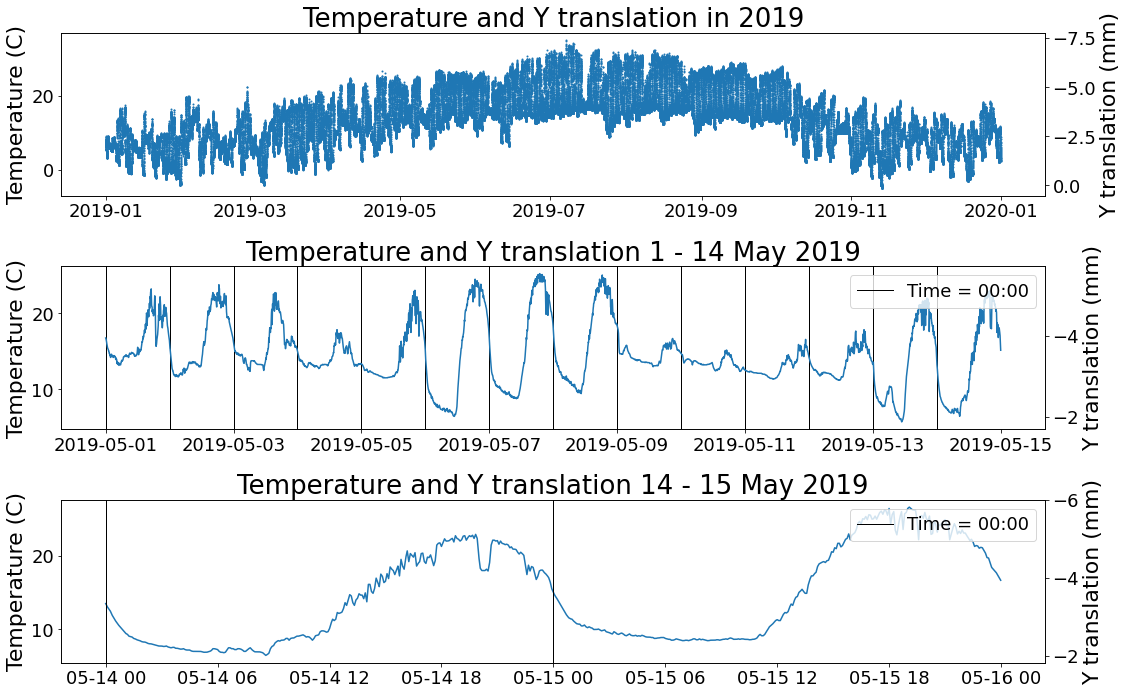

In [219]:
plt.landscape()
plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot_temp_two_weeks()
plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot_temp_days()
plt.subplot2grid((3, 3), (0, 0), colspan=3)
plot_temp_year()
plt.tight_layout()
plt.savefig("./writing/thesis/saved-images/temperature.pdf")
plt.show()